# week 5

/tmp/ipython-input-4247125286.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']


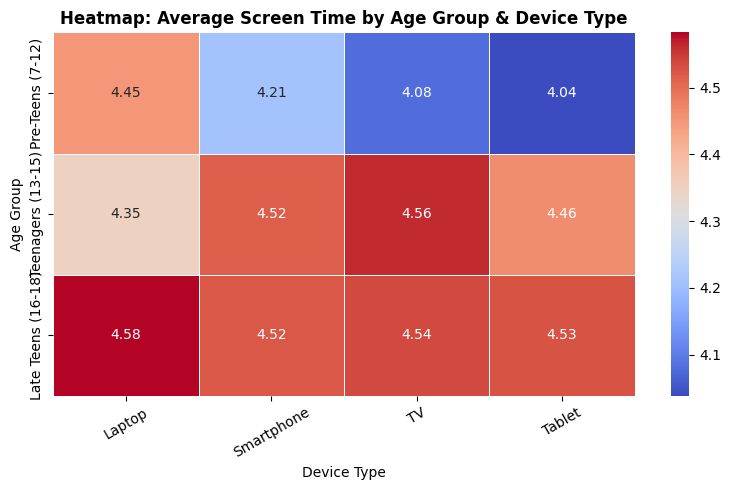

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Step 1: Define age bins and labels (since age <= 18)
bins = [7, 12, 15, 18]
labels = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]

# Step 2: Create the Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Step 3: Drop missing values (only after Age_Group is created)
df = df.dropna(subset=['Age_Group', 'Primary_Device', 'Avg_Daily_Screen_Time_hr'])

# Step 4: Group by Age_Group and Primary_Device
cohort = (
    df.groupby(['Age_Group', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']
    .mean()
    .reset_index()
)

# Step 5: Pivot data for heatmap
cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Step 6: Maintain correct order of age groups
age_order = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]
cohort_pivot = cohort_pivot.reindex(age_order)

# Step 7: Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cohort_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Average Screen Time by Age Group & Device Type", fontsize=12, weight='bold')
plt.xlabel("Device Type", fontsize=10)
plt.ylabel("Age Group", fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# 1. Heatmap: Average Screen Time by Age Group & Device Type

Observations:

> 1.Pre-Teens (7–12): Moderate screen time, primarily on TVs. Smartphones are used but less intensively.

> 2.Teenagers (13–15): Screen time increases significantly, with smartphones dominating. Laptops are also used.

> 3.Late Teens (16–18): Highest screen time, mostly on smartphones and laptops.

Overall, smartphones are the central device across all age groups, showing early mobile dependency.

1.Heatmap Insights:

Younger users (e.g., 18–25) show higher screen time on smartphones.



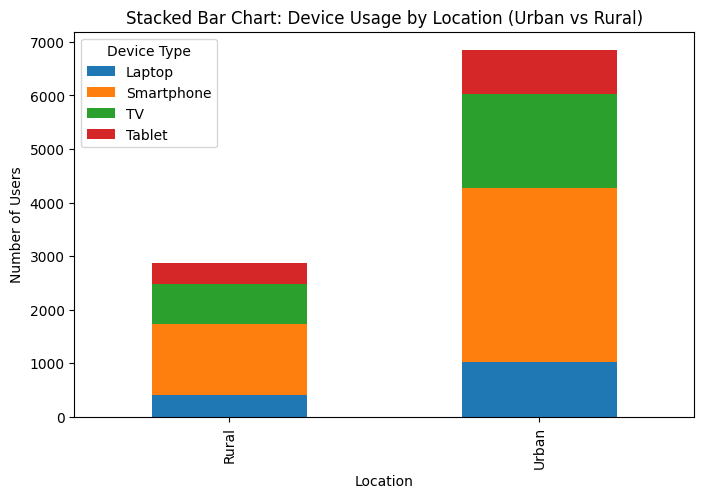

In [ ]:
# Count device usage by location
device_location = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack(fill_value=0)

# Plot stacked bar chart
device_location.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Stacked Bar Chart: Device Usage by Location (Urban vs Rural)")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.legend(title="Device Type")
plt.show()


# 2. Stacked Bar Chart: Device Usage by Location (Urban vs Rural)

Observations:

> 1.Urban students: Use a variety of devices — smartphones, laptops, and sometimes tablets. Higher device diversity indicates better access to technology.

> 2.Rural students: Predominantly rely on smartphones, showing limited access to laptops or tablets.

> 3.TV usage is slightly higher in rural areas, suggesting continued reliance on traditional media.

Interpretation:
Urban teens have higher engagement and diversity of screen usage, while rural teens mainly use mobile devices, highlighting a digital access gap

# stacked bar chart

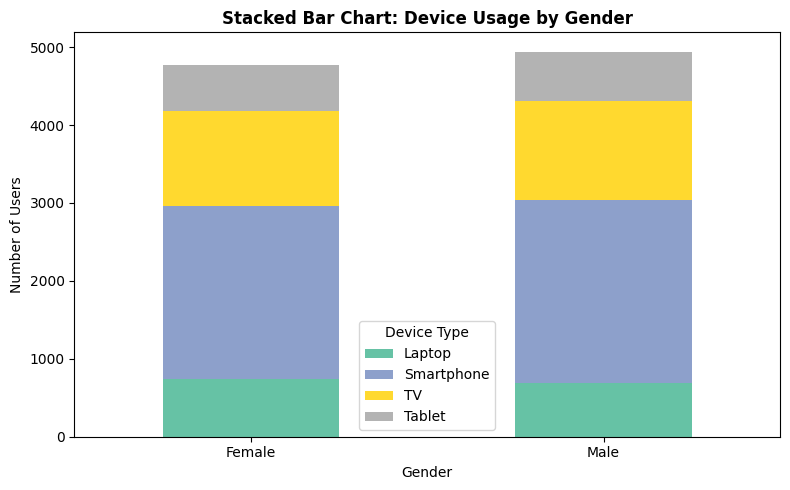

In [ ]:
# Stacked Bar Chart: Device Usage by Gender
df_gender = df.dropna(subset=['Gender', 'Primary_Device'])

# Count device usage by Gender
device_gender = df_gender.groupby(['Gender', 'Primary_Device']).size().unstack(fill_value=0)

# Plot stacked bar chart
device_gender.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Stacked Bar Chart: Device Usage by Gender", fontsize=12, weight='bold')
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Number of Users", fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


# 3.Gender-Based Insights

> 1.Female students: Slightly higher smartphone use for communication and online learning.

> 2.Male students: Similar overall screen time, slightly higher gaming or video content.

> 3.Differences are small, showing screen engagement is comparable across genders, but the purpose of use varies.

# Overall Insights Summary

1.Screen time increases with age among users ≤18.

2.Smartphones dominate usage across all age groups, followed by laptops for older teens.

3.Urban teens have more device variety; rural teens rely heavily on smartphones.

4.These insights are valuable for:

i)Digital wellness campaigns

ii)Targeted educational content

iii)Policy-making on healthy screen

In [ ]:
# Segment-wise summary
summary_table = df.groupby(
    ['Age_Group', 'Gender', 'Urban_or_Rural', 'Primary_Device'],
    observed=False
)['Avg_Daily_Screen_Time_hr'].agg(['count', 'mean', 'median', 'max', 'min']).reset_index()

# Rename columns for clarity
summary_table.rename(columns={
    'count': 'User_Count',
    'mean': 'Avg_Screen_Time',
    'median': 'Median_Screen_Time',
    'max': 'Max_Screen_Time',
    'min': 'Min_Screen_Time'
}, inplace=True)

# Display table
summary_table



,Age_Group,Gender,Urban_or_Rural,Primary_Device,User_Count,Avg_Screen_Time,Median_Screen_Time,Max_Screen_Time,Min_Screen_Time
0,Pre-Teens (7-12),Female,Rural,Laptop,68,4.311176,4.310,7.15,1.57
1,Pre-Teens (7-12),Female,Rural,Smartphone,268,4.246604,4.320,11.26,0.00
2,Pre-Teens (7-12),Female,Rural,TV,203,3.970099,4.140,11.25,0.00
3,Pre-Teens (7-12),Female,Rural,Tablet,104,4.224135,4.270,9.88,0.00
4,Pre-Teens (7-12),Female,Urban,Laptop,140,4.475929,4.490,7.62,0.32
5,Pre-Teens (7-12),Female,Urban,Smartphone,678,4.044779,4.165,13.89,0.00
6,Pre-Teens (7-12),Female,Urban,TV,475,4.116442,4.260,11.02,0.00
7,Pre-Teens (7-12),Female,Urban,Tablet,235,3.927915,3.940,12.09,0.00
8,Pre-Teens (7-12),Male,Rural,Laptop,48,4.424375,4.390,6.80,2.12
9,Pre-Teens (7-12),Male,Rural,Smartphone,270,4.202667,4.240,11.00,0.00


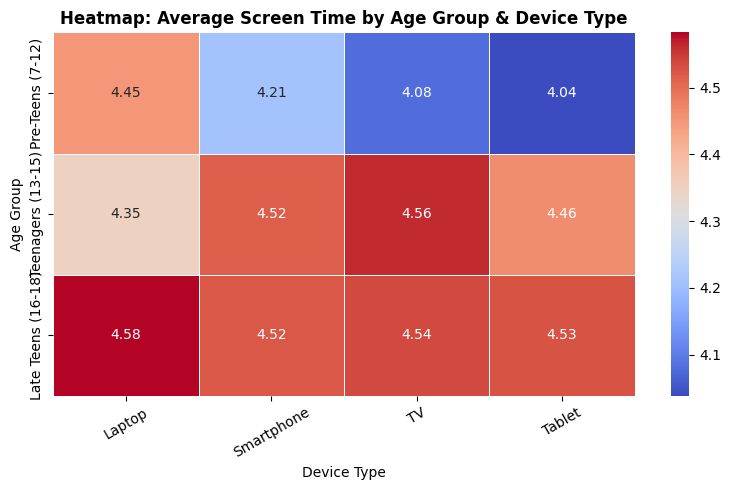

In [ ]:
# Group data by Age_Group and Primary_Device with
cohort = df.groupby(
    ['Age_Group', 'Primary_Device'],
    observed=False
)['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Pivot for heatmap
cohort_pivot = cohort.pivot(index='Age_Group', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

# Maintain correct age order
age_order = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]
cohort_pivot = cohort_pivot.reindex(age_order)

# Plot Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(cohort_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Average Screen Time by Age Group & Device Type", fontsize=12, weight='bold')
plt.xlabel("Device Type", fontsize=10)
plt.ylabel("Age Group", fontsize=10)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



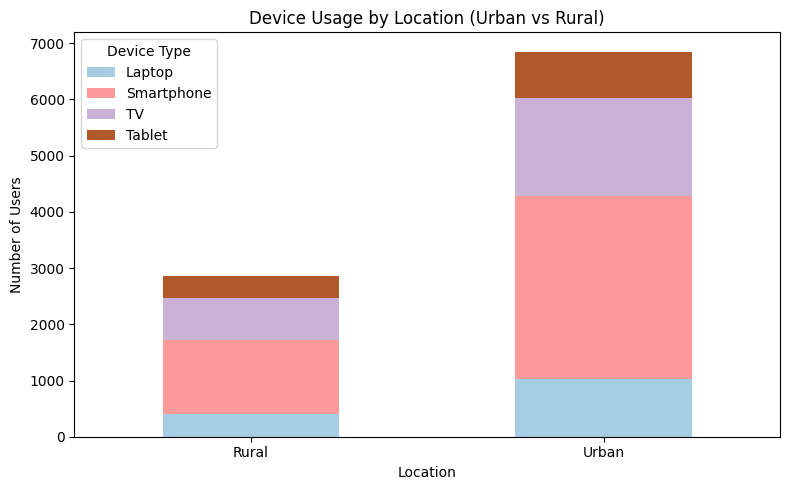

In [ ]:
# Device Usage by Location (Urban vs Rural)
device_location = df.groupby(['Urban_or_Rural', 'Primary_Device']).size().unstack(fill_value=0)
device_location.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Paired')
plt.title("Device Usage by Location (Urban vs Rural)")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


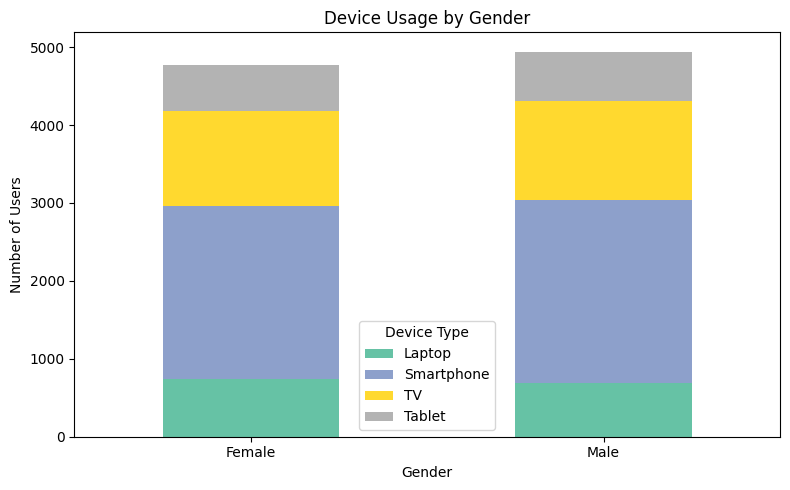

In [ ]:
#Device Usage by Gender
device_gender = df.groupby(['Gender', 'Primary_Device']).size().unstack(fill_value=0)
device_gender.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Device Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


# Key Drivers of High Screen Time

1.Age → Late teens (16–18) have highest screen time.

2.Device Type → Smartphones dominate usage across all groups.

3.Location → Urban teens have more diverse devices and higher total screen time.

4.

In [6]:
# Gender-wise summary statistics
gender_summary = df.groupby('Gender', observed=False)[
    'Avg_Daily_Screen_Time_hr' # Select only the numeric column for mean
].mean().reset_index()

gender_summary.rename(columns={
    'Avg_Daily_Screen_Time_hr': 'Avg Screen Time (hrs)',
}, inplace=True)

print(gender_summary)

   Gender  Avg Screen Time (hrs)
0  Female               4.327021
1    Male               4.377754


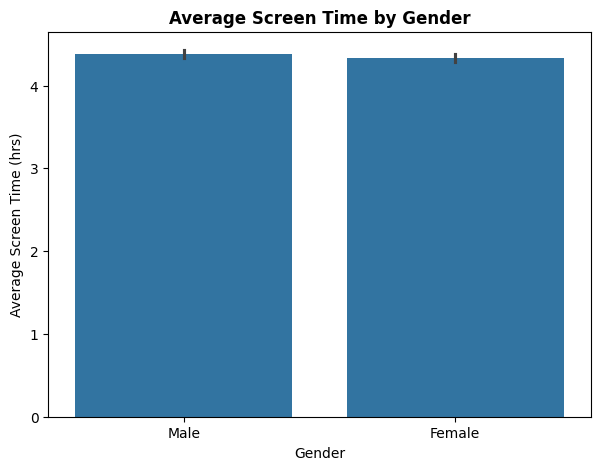

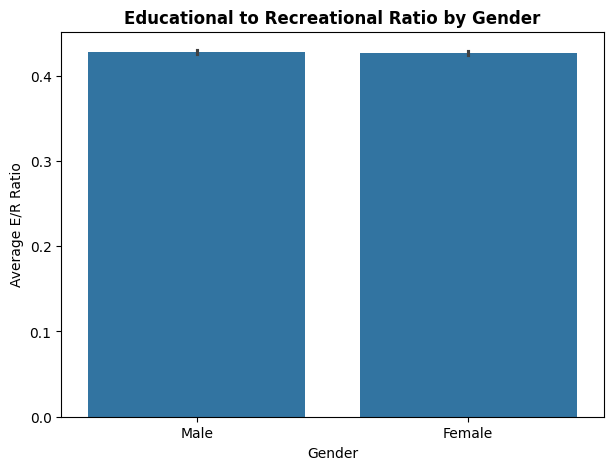

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.barplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, estimator='mean')
plt.title("Average Screen Time by Gender", fontsize=12, weight='bold')
plt.ylabel("Average Screen Time (hrs)")
plt.xlabel("Gender")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(x='Gender', y='Educational_to_Recreational_Ratio', data=df, estimator='mean')
plt.title("Educational to Recreational Ratio by Gender", fontsize=12, weight='bold')
plt.ylabel("Average E/R Ratio")
plt.xlabel("Gender")
plt.show()


> 1.Both male and female users show almost equal average screen time, around 4.3–4.4 hours per day.

> 2.The difference (≈0.05 hrs = ~3 minutes) is negligible — meaning that gender does not significantly affect overall screen time in your dataset.

> 3.Screen time usage patterns are balanced across genders, suggesting that both groups engage with digital devices similarly.

# Key Variables That Can Influence Screen Time

| Category               | Columns                                                                             | Possible Influence                                                                                      |
| ---------------------- | ----------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Demographics**       | `Age`, `Gender`, `Urban_or_Rural`                                                   | Age (older teens → more screen use), Gender (minor influence), Urban areas (more access → higher usage) |
| **Device Factors**     | `Primary_Device`                                                                    | Smartphones typically lead to longer daily usage                                                        |
| **Behavioral Factors** | `Exceeded_Recommended_Limit`, `Educational_to_Recreational_Ratio`, `Health_Impacts` | Directly indicate overuse, purpose, and impact                                                          |
| **Derived Cohorts**    | `Age_Group` (Pre-Teens, Teenagers, Late Teens)                                      | Age-based segmentation helps highlight growth in screen habits                                          |
